In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv('dataset_mood_smartphone.csv')


In [113]:
df.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [114]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

The datatypes

In [127]:
df.isna().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

- 202 missing values in the column "values"

In [129]:
# transorming the dtype of "time"
df["time"] = pd.to_datetime(df["time"])
df = df.drop('Unnamed: 0', axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [117]:
# transformatiing the variable name

# removed appcat string from variable name
# AS14.01 -> 01
df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')

In [131]:
df.describe(include="all")


,id,time,variable,value
count,376912,376912,376912,376710.000000
unique,27,336907,19,NaN
top,01,2014-04-14 12:00:00,screen,NaN
freq,21999,91,96578,NaN
first,NaN,2014-02-17 07:00:52.197000,NaN,NaN
last,NaN,2014-06-09 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,40.665313
std,NaN,NaN,NaN,273.726007
min,NaN,NaN,NaN,-82798.871000
25%,NaN,NaN,NaN,2.025000


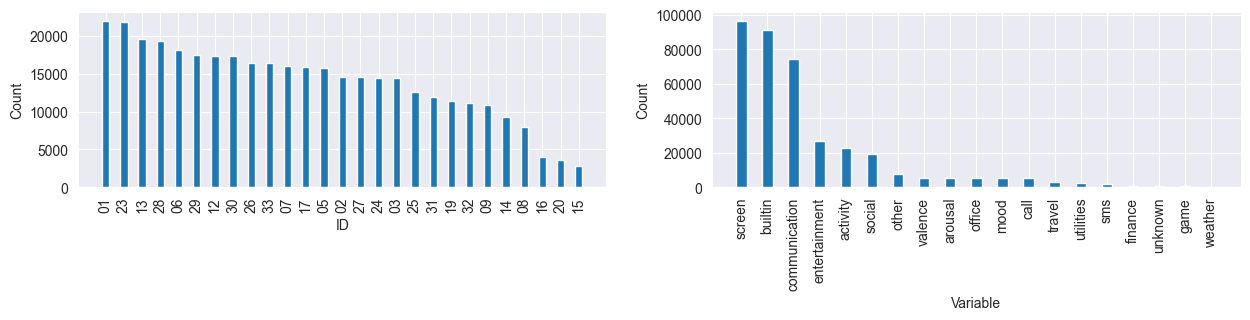

In [119]:
fig,ax = plt.subplots(1,2,figsize=[15,5])


x = df['id'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,1)
plt.bar(cols, vals, width = 0.4) 
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=90)

x = df['variable'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,2)
plt.bar(cols, vals, width = 0.4)
plt.xlabel("Variable")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()


- It can be seen that the amount of data collected for various id's is different.
- Similarly, the observed data per variable is non homgenously distributed

In [120]:
# import warnings
# warnings.filterwarnings('ignore')

# x = df['id'].value_counts()
# cols = [i for i in x.axes[0]]
# count = 1
# for i in cols:
#     # plt.subplot(14,2,count)
#     # count += 1

#     grouped = df.groupby('id')
#     col = grouped.get_group(i)

#     x = col['variable'].value_counts()
#     x = [i for i in x.axes[0]]
#     y = list(col['variable'].value_counts())
#     z=x
#     data_list = pd.DataFrame(
#         {'x_axis': x,
#         'y_axis': y,
#         'category': z
#         })

#     minsize = min(data_list['y_axis'])
#     maxsize = max(data_list['y_axis'])

#     sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="category",sizes=(100,100), data=data_list)
#     sns.set_style('darkgrid')
#     plt.xticks(rotation=90)
#     plt.xlabel('Variables')
#     plt.ylabel('Count')
#     plt.title(f'Count of variables per id for participant {i}')
# # plt.show()

In [121]:
df.dtypes



Unnamed: 0             int64
id                    object
time          datetime64[ns]
variable              object
value                float64
dtype: object

In [122]:
df['variable'].unique()


array(['mood', 'arousal', 'valence', 'activity', 'screen', 'call', 'sms',
       'builtin', 'communication', 'entertainment', 'finance', 'game',
       'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'], dtype=object)

In [123]:
# for variable in df['variable'].unique():
#     temp_df = df[df['variable'] == 'mood']
#     group = temp_df.groupby('id')['value'].mean().reset_index()
#     # plot the grouped data
#     sns.set(rc={'figure.figsize':(10,5)})
#     sns.scatterplot(x=group['id'], y = group['value'])
#     plt.xlabel('id')
#     plt.ylabel('mean value')
#     plt.title(f'Mean value of {variable} column for each id')
#     plt.figure(figsize=(200, 5))
#     plt.show()

In [134]:
df.pivot(index=['id', 'time'], columns='variable', values='value')

ValueError: Index contains duplicate entries, cannot reshape

In [133]:
df_grouped = df.groupby([df['id'], df['variable'], df['time'].dt.date])

# Apply mean aggregation to "value" column for each group
df_mean = df_grouped.agg({'value': 'mean'})

# Reset index to make the groupby columns as regular columns
df_mean = df_mean.reset_index()

# Pivot the data
new_df = df_mean.pivot(index=['id', 'time'], columns='variable', values='value')

,id,time,variable,value
0,01,2014-02-26 13:00:00.000,mood,6.000
1,01,2014-02-26 15:00:00.000,mood,6.000
2,01,2014-02-26 18:00:00.000,mood,6.000
3,01,2014-02-26 21:00:00.000,mood,7.000
4,01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,30,2014-04-11 07:51:16.948,weather,8.032
376908,30,2014-04-19 11:00:32.747,weather,3.008
376909,30,2014-04-26 10:19:07.434,weather,7.026
376910,30,2014-04-27 00:44:48.450,weather,23.033
